In [1]:
import pandas as pd
import os
import numpy as np
#from mne.datasets.mtrf.mtrf import data_name

In [2]:
def read_file(file_path):
    """
    Reads a CSV file and returns a DataFrame with specific columns.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: A DataFrame containing the specified columns.
    """

    # Check if the file exists
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")

    # Read the CSV file
    df = pd.read_csv(file_path)

    # Select specific columns
    selected_columns = ['id', 'name', 'age']

    # Check if the selected columns exist in the DataFrame
    missing_columns = [col for col in selected_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"The following columns are missing from the DataFrame: {missing_columns}")

    # Return the DataFrame with selected columns
    return df[selected_columns]

In [3]:
# Test the function with a sample CSV file
# Create a sample CSV file
sample_data = {
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 35],
    'city': ['New York', 'Los Angeles', 'Chicago']
}
df = pd.DataFrame(sample_data)
sample_file_path = 'sample.csv'
df.to_csv(sample_file_path, index=False)

# Read the file using the function
try:
    result_df = read_file(sample_file_path)
    print(result_df)
except Exception as e:
    print(f"Error: {e}")

   id     name  age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35


In [4]:
# Clean up the sample file after testing
os.remove(sample_file_path)

<div style="text-align: center; font-size: 24px;">
    <b>Filter YLDs and DALYs</b>
</div>


In [3]:
# Read data from GHD2021_Schizophrenia/Schiz/
yld_df = pd.DataFrame()
daly_df = pd.DataFrame()
file_path = "./"
for x in range(1, 2):
    #file_name = file_path + f"IHME-GBD_2021_DATA-851501aa-{x}.csv"
    file_name = file_path + f"IHME-GBD_2021_DATA-575f1e63-1.csv"
    if not os.path.isfile(file_name):
        print(f"File not found: {file_name}")
        continue

    df = pd.read_csv(file_name)
    print(f"Reading file: {file_name}")
    print(f"Columns: {df.columns}")
    print(f"First few rows:\n{df.head()}")

    filtered_df = df[(df['measure_id'] == 3) & (df['metric_id'] == 1)]
    print(f"Filtered YLD rows: {filtered_df.shape[0]}")

    if not filtered_df.empty:
        yld_df = pd.concat([yld_df, filtered_df], ignore_index=True)

    filtered_df = df[(df['measure_id'] == 2) & (df['metric_id'] == 1)]
    print(f"Filtered DALY rows: {filtered_df.shape[0]}")

    if not filtered_df.empty:
        daly_df = pd.concat([daly_df, filtered_df], ignore_index=True)



if yld_df.empty:
    print("No data matched the filtering condition. The resulting DataFrame is empty.")
else:
    yld_df.to_csv("new_data/YLDs.csv", index=False)
    print("YLDs.csv has been created successfully.")


if daly_df.empty:
    print("No data matched the filtering condition. The resulting DataFrame is empty.")
else:
    daly_df.to_csv("new_data/DALYs.csv", index=False)
    print("DALYs.csv has been created successfully.")

Reading file: ./IHME-GBD_2021_DATA-575f1e63-1.csv
Columns: Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id',
       'metric_name', 'year', 'val', 'upper', 'lower'],
      dtype='object')
First few rows:
   measure_id                            measure_name  location_id  \
0           2  DALYs (Disability-Adjusted Life Years)            1   
1           2  DALYs (Disability-Adjusted Life Years)            1   
2           2  DALYs (Disability-Adjusted Life Years)            1   
3           2  DALYs (Disability-Adjusted Life Years)            1   
4           2  DALYs (Disability-Adjusted Life Years)            1   

  location_name  sex_id sex_name  age_id  age_name  cause_id     cause_name  \
0        Global       1     Male       1  <5 years       559  Schizophrenia   
1        Global       2   Female       1  <5 years       559  Schizophrenia   
2        Global       3     Bo

In [9]:
#Release memory
del yld_df
del daly_df

<div style="text-align: center; font-size: 24px;">
    <b>Filter Prevalance and Incidence</b>
</div>


In [4]:
# Read data from GHD2021_Schizophrenia/Schiz/
incidence6_df = pd.DataFrame()
prevalance5_df = pd.DataFrame()
file_path = "./"
for x in range(1, 2):
    #file_name = file_path + f"IHME-GBD_2021_DATA-851501aa-{x}.csv"
    file_name = file_path + f"IHME-GBD_2021_DATA-575f1e63-1.csv"
    if not os.path.isfile(file_name):
        print(f"File not found: {file_name}")
        continue

    df = pd.read_csv(file_name)
    print(f"Reading file: {file_name}")
    print(f"Columns: {df.columns}")
    print(f"First few rows:\n{df.head()}")

    filtered_df = df[(df['measure_id'] == 6) & (df['metric_id'] == 1)]
    print(f"Filtered Incidence rows: {filtered_df.shape[0]}")

    if not filtered_df.empty:
        incidence6_df = pd.concat([incidence6_df, filtered_df], ignore_index=True)

    filtered_df = df[(df['measure_id'] == 5) & (df['metric_id'] == 1)]
    print(f"Filtered Prevalance rows: {filtered_df.shape[0]}")

    if not filtered_df.empty:
        prevalance5_df = pd.concat([prevalance5_df, filtered_df], ignore_index=True)



if incidence6_df.empty:
    print("No data matched the filtering condition. The resulting DataFrame is empty.")
else:
    incidence6_df.to_csv("new_data/Incidence.csv", index=False)
    print("Incidence.csv has been created successfully.")


if prevalance5_df.empty:
    print("No data matched the filtering condition. The resulting DataFrame is empty.")
else:
    prevalance5_df.to_csv("new_data/Prevalence.csv", index=False)
    print("Prevalence.csv has been created successfully.")

Reading file: ./IHME-GBD_2021_DATA-575f1e63-1.csv
Columns: Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id',
       'metric_name', 'year', 'val', 'upper', 'lower'],
      dtype='object')
First few rows:
   measure_id                            measure_name  location_id  \
0           2  DALYs (Disability-Adjusted Life Years)            1   
1           2  DALYs (Disability-Adjusted Life Years)            1   
2           2  DALYs (Disability-Adjusted Life Years)            1   
3           2  DALYs (Disability-Adjusted Life Years)            1   
4           2  DALYs (Disability-Adjusted Life Years)            1   

  location_name  sex_id sex_name  age_id  age_name  cause_id     cause_name  \
0        Global       1     Male       1  <5 years       559  Schizophrenia   
1        Global       2   Female       1  <5 years       559  Schizophrenia   
2        Global       3     Bo

In [10]:
# Release memory
del incidence6_df
del prevalance5_df

<div style="text-align: center; font-size: 24px;">
    <b>Filter each data by year</b>
</div>



In [7]:
# Read data from GHD2021_Schizophrenia/Schiz/
temp_df = pd.DataFrame()
data_names = ["DALYs", "YLDs", "Incidence", "Prevalence"]

# Filter data by year
for name in data_names:

    file_name = F"new_data/{name}.csv"
    directory_path = f'new_data/{name}'

    if not os.path.exists(directory_path):
        # Create the directory
        os.makedirs(directory_path)

    df = pd.read_csv(file_name)
    print(f"Reading file: {file_name}")
    print(f"Columns: {df.columns}")
    print(f"First few rows:\n{df.head()}")

    for x in range(1990, 2022):

        temp_df = df[(df['year'] == x) & (df['metric_id'] == 1)]
        print(f"Filtered {name} rows: {temp_df.shape[0]}")

        if temp_df.empty:
            print("No data matched the filtering condition. The resulting DataFrame is empty.")
        else:
            temp_df.to_csv(f"new_data/{name}/{name}_{x}.csv", index=False)
            print(f"{name}_{x}.csv has been created successfully.")


Reading file: new_data/DALYs.csv
Columns: Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id',
       'metric_name', 'year', 'val', 'upper', 'lower'],
      dtype='object')
First few rows:
   measure_id                            measure_name  location_id  \
0           2  DALYs (Disability-Adjusted Life Years)            1   
1           2  DALYs (Disability-Adjusted Life Years)            1   
2           2  DALYs (Disability-Adjusted Life Years)            1   
3           2  DALYs (Disability-Adjusted Life Years)            1   
4           2  DALYs (Disability-Adjusted Life Years)            1   

  location_name  sex_id sex_name  age_id   age_name  cause_id     cause_name  \
0        Global       1     Male       1   <5 years       559  Schizophrenia   
1        Global       2   Female       1   <5 years       559  Schizophrenia   
2        Global       3     Both       1   <

In [ ]:
# Middle SDI - 44639
# High SDI   - 44635
# Low SDI    - 44637
# Low-middle SDI - 44636
# High-middle SDI - 44634

<div style="text-align: center; font-size: 24px;">
    <b>Seperate SDI and Country
    </b>
</div>


In [8]:
# Read data from GHD2021_Schizophrenia/Schiz/
temp_df = pd.DataFrame()
data_names = ["DALYs", "YLDs", "Incidence", "Prevalence"]

# Filter data by year
for name in data_names:

    file_name = F"new_data/{name}.csv"
    directory_path = f'new_data/{name}'

    if not os.path.exists(directory_path):
        # Create the directory
        os.makedirs(directory_path)

    df = pd.read_csv(file_name)
    print(f"Reading file: {file_name}")
    print(f"Columns: {df.columns}")
    print(f"First few rows:\n{df.head()}")

    for x in range(1990, 2022):

        temp_df = df[(df['year'] == x) & (df['metric_id'] == 1) & (df['location_id']<40000)]
        print(f"Filtered {name} rows: {temp_df.shape[0]}")

        if temp_df.empty:
            print("No data matched the filtering condition. The resulting DataFrame is empty.")
        else:
            temp_df.to_csv(f"new_data/{name}/{name}_countries_{x}.csv", index=False)
            print(f"{name}_countries_{x}.csv has been created successfully.")

        temp_df = df[(df['year'] == x) & (df['metric_id'] == 1) & (df['location_id'] > 40000)]
        print(f"Filtered {name} rows: {temp_df.shape[0]}")

        if temp_df.empty:
            print("No data matched the filtering condition. The resulting DataFrame is empty.")
        else:
            temp_df.to_csv(f"new_data/{name}/{name}_SDI_{x}.csv", index=False)
            print(f"{name}_SDI_{x}.csv has been created successfully.")


Reading file: new_data/DALYs.csv
Columns: Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'metric_id',
       'metric_name', 'year', 'val', 'upper', 'lower'],
      dtype='object')
First few rows:
   measure_id                            measure_name  location_id  \
0           2  DALYs (Disability-Adjusted Life Years)            1   
1           2  DALYs (Disability-Adjusted Life Years)            1   
2           2  DALYs (Disability-Adjusted Life Years)            1   
3           2  DALYs (Disability-Adjusted Life Years)            1   
4           2  DALYs (Disability-Adjusted Life Years)            1   

  location_name  sex_id sex_name  age_id   age_name  cause_id     cause_name  \
0        Global       1     Male       1   <5 years       559  Schizophrenia   
1        Global       2   Female       1   <5 years       559  Schizophrenia   
2        Global       3     Both       1   <

In [ ]:
# Read data from GHD2021_Schizophrenia/Schiz/
temp_df = pd.DataFrame()
data_names = ["DALYs", "YLDs", "Incidence", "Prevalence"]

# Filter data by year
for name in data_names:

    file_name = F"filtered_csv/{name}.csv"
    directory_path = f'filtered_csv/{name}'

    if not os.path.exists(directory_path):
        # Create the directory
        os.makedirs(directory_path)

    df = pd.read_csv(file_name)
    print(f"Reading file: {file_name}")
    print(f"Columns: {df.columns}")
    print(f"First few rows:\n{df.head()}")

    for x in range(1990, 2022):

        temp_df = df[(df['year'] == x) & (df['metric_id'] == 1) & (df['location_id']<40000)]
        print(f"Filtered {name} rows: {temp_df.shape[0]}")

        if temp_df.empty:
            print("No data matched the filtering condition. The resulting DataFrame is empty.")
        else:
            temp_df.to_csv(f"filtered_csv/{name}/{name}_countries_{x}.csv", index=False)
            print(f"{name}_countries_{x}.csv has been created successfully.")

        temp_df = df[(df['year'] == x) & (df['metric_id'] == 1) & (df['location_id'] > 40000)]
        print(f"Filtered {name} rows: {temp_df.shape[0]}")

        if temp_df.empty:
            print("No data matched the filtering condition. The resulting DataFrame is empty.")
        else:
            temp_df.to_csv(f"filtered_csv/{name}/{name}_SDI_{x}.csv", index=False)
            print(f"{name}_SDI_{x}.csv has been created successfully.")


In [ ]:
import matplotlib.pyplot as plt
# Read data from GHD2021_Schizophrenia/Schiz/
temp_df = pd.DataFrame()
data_names = ["DALYs", "YLDs", "Incidence", "Prevalence"]
years = range(1990, 2022)

low_SDI_by_year = {name: [] for name in data_names}
low_middle_SDI_by_year = {name: [] for name in data_names}
middle_SDI_by_year = {name: [] for name in data_names}
high_middle_SDI_by_year = {name: [] for name in data_names}
high_SDI_by_year = {name: [] for name in data_names}

# Filter data by year
for name in data_names:
    for x in years:
        directory_path = f'filtered_csv/{name}'
        file_name = directory_path + f"/{name}_SDI_{x}.csv"
        if not os.path.isfile(file_name):
            print(f"File not found: {file_name}")
            continue

        df = pd.read_csv(file_name)

        low_SDI_df = df[(df['location_id'] == 44637) & (df['age_id'] == 22)]
        low_middle_SDI_df = df[(df['location_id'] == 44636) & (df['age_id'] == 22)]
        middle_SDI_df = df[(df['location_id'] == 44639) & (df['age_id'] == 22)]
        high_middle_SDI_df = df[(df['location_id'] == 44634) & (df['age_id'] == 22)]
        high_SDI_df = df[(df['location_id'] == 44635) & (df['age_id'] == 22)]


# Plot the data
plt.figure(figsize=(12, 6))
for name in data_names:
    plt.plot(years, data_by_year[name], label=name)

plt.title("Data Trends by Year")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

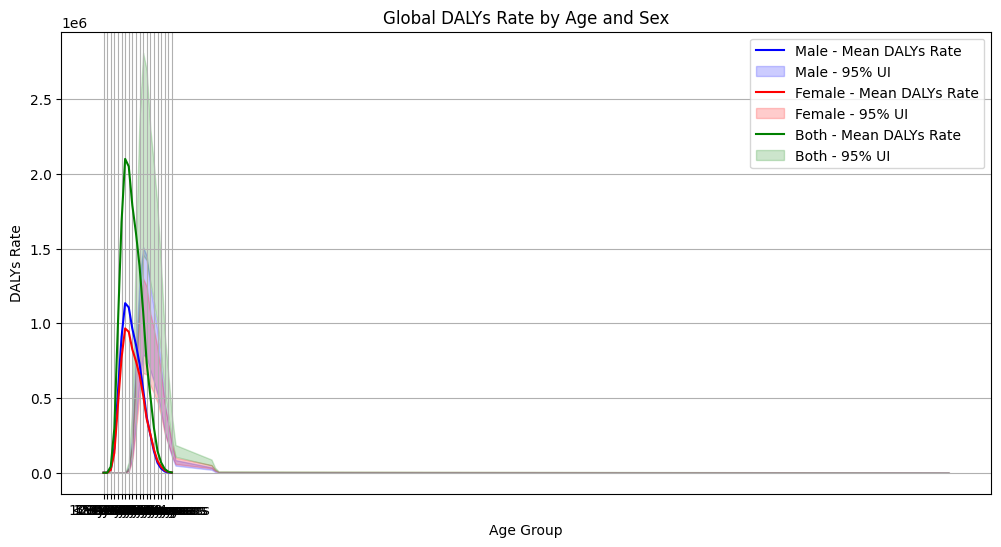

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DALYs data
file_path = 'new_data/DALYs/DALYs_countries_2021.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Filter for global data
global_dalys = df[df['location_name'] == 'Global']

# Separate data by sex
male_data = global_dalys[global_dalys['sex_id'] == 1]
female_data = global_dalys[global_dalys['sex_id'] == 2]
both_data = global_dalys[global_dalys['sex_id'] == 3]

# Plot the data
plt.figure(figsize=(12, 6))

# Male
plt.plot(male_data['age_name'], male_data['val'], label='Male - Mean DALYs Rate', color='blue')
plt.fill_between(male_data['age_id'], male_data['lower'], male_data['upper'], color='blue', alpha=0.2, label='Male - 95% UI')

# Female
plt.plot(female_data['age_name'], female_data['val'], label='Female - Mean DALYs Rate', color='red')
plt.fill_between(female_data['age_id'], female_data['lower'], female_data['upper'], color='red', alpha=0.2, label='Female - 95% UI')

# Both
plt.plot(both_data['age_name'], both_data['val'], label='Both - Mean DALYs Rate', color='green')
plt.fill_between(both_data['age_id'], both_data['lower'], both_data['upper'], color='green', alpha=0.2, label='Both - 95% UI')

# Add labels, title, and legend
plt.title('Global DALYs Rate by Age and Sex')
plt.xlabel('Age Group')
plt.ylabel('DALYs Rate')
plt.legend()
plt.grid(True)
plt.show()

PLOT DALYYYYYYYYYYYYYY



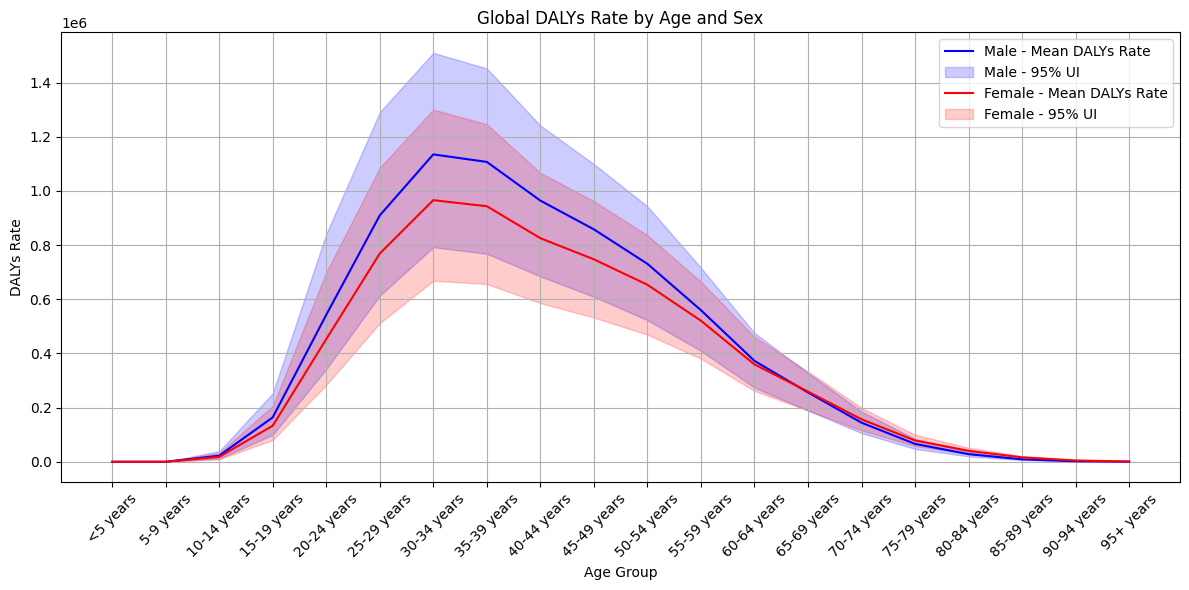

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DALYs data
file_path = 'new_data/DALYs/DALYs_countries_2021.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Filter for global data
global_dalys = df[df['location_name'] == 'Global']

# Separate data by sex
male_data = global_dalys[global_dalys['sex_id'] == 1]
female_data = global_dalys[global_dalys['sex_id'] == 2]
both_data = global_dalys[global_dalys['sex_id'] == 3]

# Plot the data
plt.figure(figsize=(12, 6))

# Male
plt.plot(male_data['age_name'], male_data['val'], label='Male - Mean DALYs Rate', color='blue')
plt.fill_between(male_data['age_name'], male_data['lower'], male_data['upper'], color='blue', alpha=0.2, label='Male - 95% UI')

# Female
plt.plot(female_data['age_name'], female_data['val'], label='Female - Mean DALYs Rate', color='red')
plt.fill_between(female_data['age_name'], female_data['lower'], female_data['upper'], color='red', alpha=0.2, label='Female - 95% UI')

# Both
# plt.plot(both_data['age_name'], both_data['val'], label='Both - Mean DALYs Rate', color='green')
# plt.fill_between(both_data['age_name'], both_data['lower'], both_data['upper'], color='green', alpha=0.2, label='Both - 95% UI')

# Add labels, title, and legend
plt.title('Global DALYs Rate by Age and Sex')
plt.xlabel('Age Group')
plt.ylabel('DALYs Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


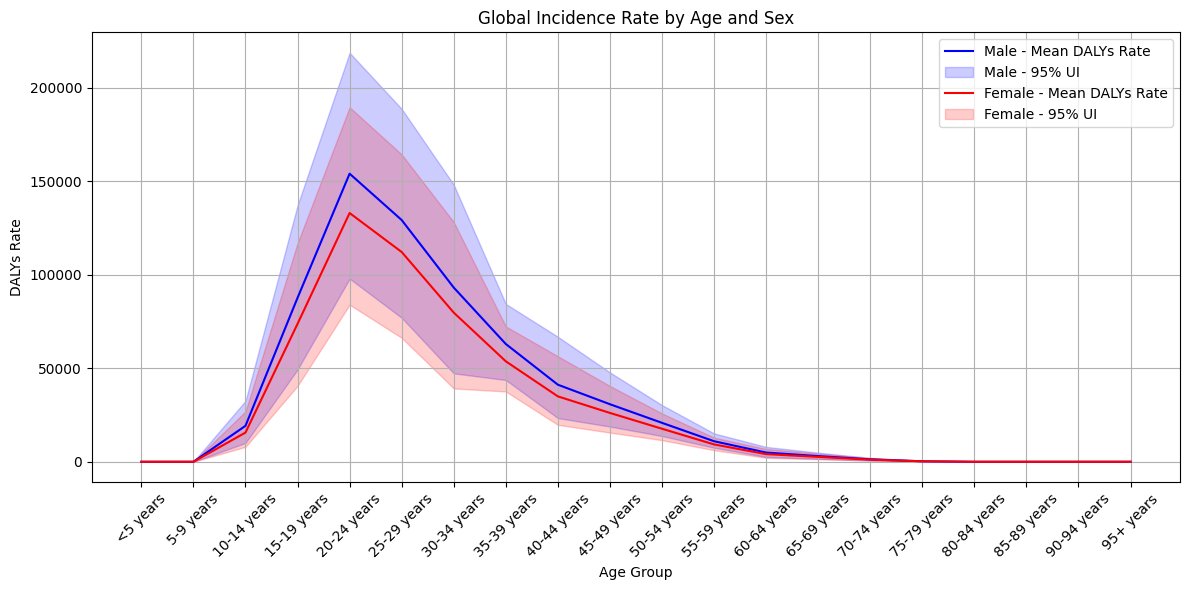

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DALYs data
file_path = 'new_data/Incidence/Incidence_countries_2021.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Filter out rows where age_id equals 22
df = df[df['age_id'] != 22]

# Sort by age_id in descending order
df = df.sort_values(by='age_id', ascending=True)

# Filter for global data
global_dalys = df[df['location_name'] == 'Global']

# Separate data by sex
male_data = global_dalys[global_dalys['sex_id'] == 1]
female_data = global_dalys[global_dalys['sex_id'] == 2]
both_data = global_dalys[global_dalys['sex_id'] == 3]

# Plot the data
plt.figure(figsize=(12, 6))

# Male
plt.plot(male_data['age_name'], male_data['val'], label='Male - Mean DALYs Rate', color='blue')
plt.fill_between(male_data['age_name'], male_data['lower'], male_data['upper'], color='blue', alpha=0.2, label='Male - 95% UI')

# Female
plt.plot(female_data['age_name'], female_data['val'], label='Female - Mean DALYs Rate', color='red')
plt.fill_between(female_data['age_name'], female_data['lower'], female_data['upper'], color='red', alpha=0.2, label='Female - 95% UI')

# Both
# plt.plot(both_data['age_name'], both_data['val'], label='Both - Mean DALYs Rate', color='green')
# plt.fill_between(both_data['age_name'], both_data['lower'], both_data['upper'], color='green', alpha=0.2, label='Both - 95% UI')

# Add labels, title, and legend
plt.title('Global Incidence Rate by Age and Sex')
plt.xlabel('Age Group')
plt.ylabel('DALYs Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


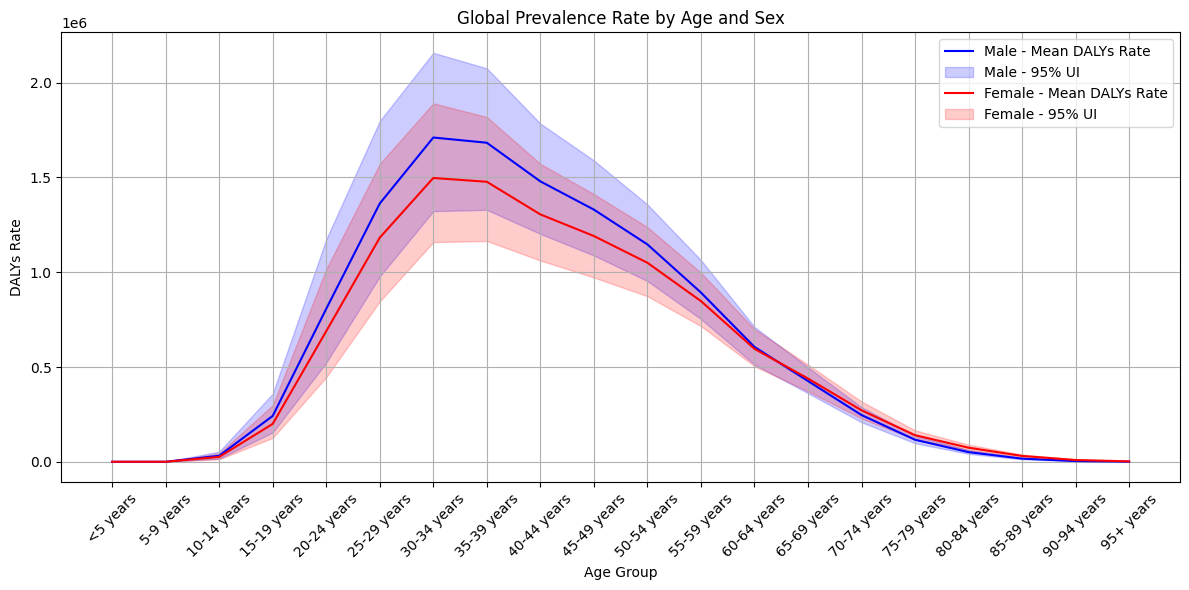

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DALYs data
file_path = 'new_data/Prevalence/Prevalence_countries_2021.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Filter out rows where age_id equals 22
df = df[df['age_id'] != 22]

# Sort by age_id in descending order
df = df.sort_values(by='age_id', ascending=True)

# Filter for global data
global_dalys = df[df['location_name'] == 'Global']

# Separate data by sex
male_data = global_dalys[global_dalys['sex_id'] == 1]
female_data = global_dalys[global_dalys['sex_id'] == 2]
both_data = global_dalys[global_dalys['sex_id'] == 3]

# Plot the data
plt.figure(figsize=(12, 6))

# Male
plt.plot(male_data['age_name'], male_data['val'], label='Male - Mean DALYs Rate', color='blue')
plt.fill_between(male_data['age_name'], male_data['lower'], male_data['upper'], color='blue', alpha=0.2, label='Male - 95% UI')

# Female
plt.plot(female_data['age_name'], female_data['val'], label='Female - Mean DALYs Rate', color='red')
plt.fill_between(female_data['age_name'], female_data['lower'], female_data['upper'], color='red', alpha=0.2, label='Female - 95% UI')

# Both
# plt.plot(both_data['age_name'], both_data['val'], label='Both - Mean DALYs Rate', color='green')
# plt.fill_between(both_data['age_name'], both_data['lower'], both_data['upper'], color='green', alpha=0.2, label='Both - 95% UI')

# Add labels, title, and legend
plt.title('Global Prevalence Rate by Age and Sex')
plt.xlabel('Age Group')
plt.ylabel('DALYs Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


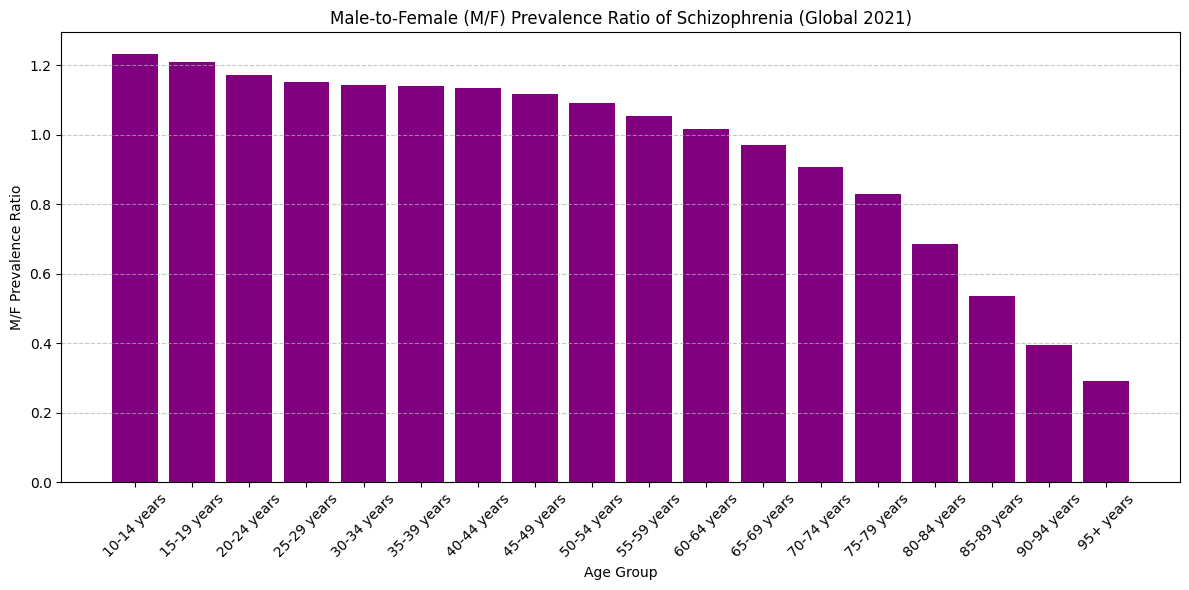

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Prevalence data
file_path = 'new_data/Prevalence/Prevalence_countries_2021.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Filter for global data and exclude age_id = 22
global_prevalence = df[(df['location_name'] == 'Global') & (df['age_id'] != 22) & (df['age_id'] > 6)]

# Separate data by sex
male_data = global_prevalence[global_prevalence['sex_id'] == 1].sort_values(by='age_id')
female_data = global_prevalence[global_prevalence['sex_id'] == 2].sort_values(by='age_id')

# Calculate the M/F prevalence ratio
male_to_female_ratio = male_data['val'].values / female_data['val'].values

# Plot the M/F prevalence ratio as a bar chart
plt.figure(figsize=(12, 6))
x = np.arange(len(male_data['age_name']))
plt.bar(x, male_to_female_ratio, color='purple', width=0.8)  # Reduce spacing by increasing bar width

# Add labels, title, and ticks
plt.title('Male-to-Female (M/F) Prevalence Ratio of Schizophrenia (Global 2021)')
plt.xlabel('Age Group')
plt.ylabel('M/F Prevalence Ratio')
plt.xticks(x, male_data['age_name'], rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()